### **Assignment #6**

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In this assignment, you will learn about kernel methods. Download the [Breast Cancer Wisconsin dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) and perform all the necessary data pre-processing.

In [86]:
data = pd.read_csv('breast_cancer.csv', delimiter=',')
data['diagnosis'] = [1 if e == 'M' else 0 for e in data['diagnosis']] # if malignant = 1, if b = 0
data = data[data.columns.to_list()[1:-1]]

data = data.sample(frac=1).reset_index(drop=True)

train = data.loc[:int(len(data)*0.7)]
test = data.loc[int(len(data)*0.7):]
 
# Standardizing the data
for feat in train.columns.to_list()[1:]:
    feat_train = train[feat]
    mean = np.mean(feat_train)
    std = np.std(feat_train)
    train.loc[:, feat] = (feat_train - mean) / std

    feat_test = test[feat]
    test.loc[:, feat] = (feat_test - mean) / std

train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,-0.278244,-1.171849,-0.279775,-0.360989,-0.121873,-0.058120,-0.622256,-0.690651,-0.562396,...,-0.487076,-1.414725,-0.551442,-0.500814,-0.790861,-0.339732,-0.583060,-0.826403,-0.753653,0.887063
1,0,-0.427476,0.139812,-0.428893,-0.481847,-0.831308,-0.024274,-0.229317,-0.427178,-0.092346,...,-0.540813,-0.422077,-0.529119,-0.544078,-1.185506,-0.225840,-0.370701,-0.552028,-0.340171,-0.341702
2,1,1.861683,0.452664,1.914903,1.903568,0.852108,1.194190,1.683275,1.707718,0.151788,...,1.608641,0.817122,1.705315,1.573040,0.590397,0.669737,1.161183,1.535535,-0.675206,0.310716
3,0,-0.528841,-0.363069,-0.525308,-0.552395,0.459147,-0.098155,-0.489455,-0.367429,0.476087,...,-0.520145,0.017847,-0.523166,-0.529715,0.453129,-0.465449,-0.511494,-0.762099,0.254720,-0.702513
4,1,2.188304,0.394729,2.303017,2.384192,-0.164678,1.807290,1.692171,1.620859,-0.310974,...,2.503558,0.401370,2.678619,2.666017,-0.233210,1.371759,1.454931,1.115085,-0.098292,0.236230


Use the Scikit-learn implementation of SVM (the SVC() function) to predict if the
tumor is malignant or not. Try different kernels. Try different:
 - kernels
 - regularization parameters
 - different σ values when using the RBF kernel (in Scikit-learn this is the γ parameter).
 
Find the best values for the parameters and do a grid search. Tip: take a look at
the GridSearchCV() function. 

In [87]:
x_train = train.drop(train[['diagnosis']], axis=1)
y_train = train['diagnosis']
x_test = test.drop(test[['diagnosis']], axis=1)
y_test = test['diagnosis']

In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# 'C': np.arange(0.01, 3, 0.25), 'degree': np.arange(2, 5), 
parameters = {'kernel': ['linear'], 'C': np.arange(0.01, 1, 0.01)}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)
print(f"lin: \t {clf.best_estimator_}")

parameters = {'kernel': ['poly'], 'degree': np.arange(1, 5, 1)} # adding C doesn't improve anything
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)
print(f"poly: \t {clf.best_estimator_}")

parameters = {'kernel': ['rbf'], 'gamma': np.arange(0.01, 0.1, 0.01)} # adding C doesn't improve anything
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)
print(f"RBF: \t {clf.best_estimator_}")

lin: 	 SVC(C=0.03, kernel='linear')
poly: 	 SVC(degree=1, kernel='poly')
RBF: 	 SVC(gamma=0.01)


Test your models. Be careful not to use the same data for any stage of training and testing your models 


In [89]:
from sklearn.metrics import precision_score, recall_score, mean_squared_error, r2_score

svc = SVC(kernel='linear', C=0.13).fit(x_train, y_train)
pred = svc.predict(x_test)
print(f"LINEAR:\nPrecision: \t{precision_score(y_test.to_numpy(), pred)}\nRecall: \t{recall_score(y_test.to_numpy(), pred)}")
print("----------------")

svc = SVC(kernel='poly', degree=1).fit(x_train, y_train)
pred = svc.predict(x_test)
print(f"POLY:\nPrecision: \t{precision_score(y_test.to_numpy(), pred)}\nRecall: \t{recall_score(y_test.to_numpy(), pred)}")
print("----------------")

svc = SVC(kernel='rbf', gamma=0.04).fit(x_train, y_train)
pred = svc.predict(x_test)
print(f"RBF:\nPrecision: \t{precision_score(y_test.to_numpy(), pred)}\nRecall: \t{recall_score(y_test.to_numpy(), pred)}")
print("----------------")

svc = SVC(kernel='rbf', gamma='auto').fit(x_train, y_train)
pred = svc.predict(x_test)
print(f"RBF - auto gamma:\nPrecision: \t{precision_score(y_test.to_numpy(), pred)}\nRecall: \t{recall_score(y_test.to_numpy(), pred)}")


LINEAR:
Precision: 	0.9846153846153847
Recall: 	0.9411764705882353
----------------
POLY:
Precision: 	1.0
Recall: 	0.8529411764705882
----------------
RBF:
Precision: 	0.9848484848484849
Recall: 	0.9558823529411765
----------------
RBF - auto gamma:
Precision: 	0.9848484848484849
Recall: 	0.9558823529411765


Implement kernel regression to model the data from Ucilnica.

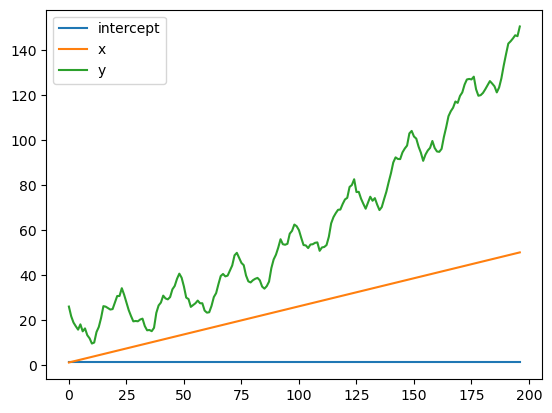

In [90]:
data2 = pd.read_csv('data.csv', delimiter=',')
data2 = data2[['x', 'y']]
data2['intercept'] = 1
data2 = data2[['intercept', 'x', 'y']]
plt.plot(data2)
plt.legend(['intercept','x', 'y'])
plt.show()

Train and test your kernel regression model.
How do I implement a kernel regression?
 - Implement at least three different kernel functions.
 - Compute the kernel matrix.
 - Compute $α = K^{−1}y$ to get the model coefficients in the multidimensional space.
 - Compute predictions for the test point $z: y(z) = k_∗α$. Where $k_∗$ is the kernel
(vector) of the test points with the training points.

$\begin{bmatrix} k(z, x_0) \\\ ... \\\ k(z, x_n) \end{bmatrix}$

Plot the data and your predictions.

In [91]:
train = data2.loc[:int(len(data2)*0.6)]
test = data2.loc[int(len(data2)*0.6):]
"""
for feat in train.columns.to_list()[1:]:
    feat_train = train[feat]
    mean = np.mean(feat_train)
    std = np.std(feat_train)
    train.loc[:, feat] = (feat_train - mean) / std

    feat_test = test[feat]
    test.loc[:, feat] = (feat_test - mean) / std
"""

x_train = train[['intercept', 'x']]
y_train = train[['y']]
x_test = test[['intercept', 'x']]
y_test = test[['y']]

In [92]:
class KernelRegression:  
    def __init__(self, kernel_type='linear', C=0.1, degree=1, gamma=1) -> None:
        self.gram_m = None
        self.alpha = None
        self.kernel_type = kernel_type
        self.C = C
        self.degree = degree
        self.gamma = gamma

    def fit(self, x, y) -> None:
        self.K_matrix(x)
        self.alpha = np.linalg.inv(self.gram_m + np.identity(len(self.gram_m))*0.1) @ y

    def predict(self, x_test, x_train) -> np.array:
        predicted = [] # np.zeros(y_test.shape)
        for sample in np.arange(0, len(x_test)):
            x_ = x_test.loc[sample+len(x_train)-1]
            vect = self.kernel_vect(x_, x_train)
            pred = vect.T @ np.array(self.alpha)
            predicted.append(pred[0])
        return np.array(predicted)

    def K_matrix(self, x): # GRAM matrix based on choosen kernel
        self.gram_m = np.zeros((len(x),)*2)
        n = len(x)
        for i in np.arange(0, n):
            for j in np.arange(0, n):
                if self.kernel_type == 'poly':
                    self.gram_m[i, j] = self.poly_kernel(x.loc[i], x.loc[j], self.C, self.degree)
                elif self.kernel_type == 'rbf':
                    self.gram_m[i, j] = self.rbf_kernel(x.loc[i], x.loc[j], self.gamma)
                else:
                    self.gram_m[i, j] = self.lin_kernel(x.loc[i], x.loc[j])
    
    def kernel_vect(self, sample, x): # test sample based on choosen kernel
        vect = np.zeros((len(x), 1))
        for i in np.arange(len(x)):
            if self.kernel_type == 'poly':
                vect[i, 0] = self.poly_kernel(sample, x.loc[i], self.C, self.degree)
            elif self.kernel_type == 'rbf':
                vect[i, 0] = self.rbf_kernel(sample, x.loc[i], self.gamma)
            else:
                vect[i, 0] = self.lin_kernel(sample, x.loc[i])
        return vect

    def lin_kernel(self, vec1, vec2): # linear kernel
        return vec1.T @ vec2
 
    def poly_kernel(self, vec1, vec2, C, degree): # polynominal kernel
        return (vec1.T @ vec2 + C)**degree

    def rbf_kernel(self, vec1, vec2, gamma): # Gaussean kernel - rbf
        diff = vec1 - vec2
        squared_dist = np.dot(diff, diff)
        return np.exp( - squared_dist / (2*gamma**2))


In [93]:
def plot_results(y_test, pred):
    fig, ax  = plt.subplots(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(pred, alpha=0.6)
    plt.plot(np.array(y_test), alpha=0.6)
    plt.plot(np.array(x_test), alpha=0.3)
    plt.ylabel("Value")
    plt.xlabel("Sample")
    plt.legend(["Predicted", "Target", "Intercept", "x"])

    plt.subplot(1, 2, 2)
    res = np.array(y_test) - pred
    plt.scatter(np.array(y_test), res)
    plt.plot((np.min(y_test), np.max(y_test)), (0, 0), alpha=0.5, linestyle='dotted')
    plt.ylabel("Residuals")
    plt.xlabel("Target values")

    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

MSE: 1027.6162691953182, R2: -0.9139902207111279


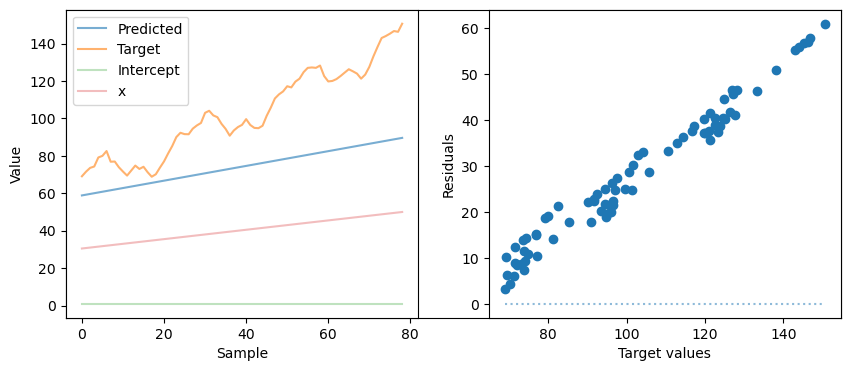

In [94]:
kernel_reg = KernelRegression(kernel_type='linear')
kernel_reg.fit(x_train, y_train)
pred = kernel_reg.predict(x_test, x_train)
print(f"MSE: {mean_squared_error(y_test, pred)}, R2: {r2_score(y_test, pred)}")
plot_results(y_test, pred)

MSE: 51.53441588303948, R2: 0.9040143962420567


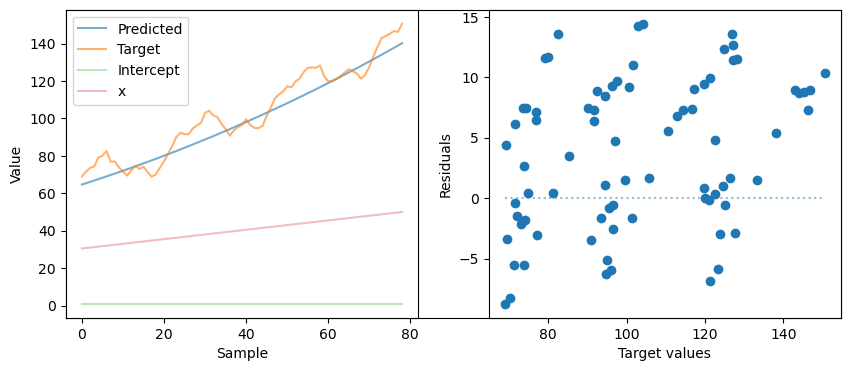

In [95]:
kernel_reg = KernelRegression(kernel_type='poly', C=1.5, degree=3)
kernel_reg.fit(x_train, y_train)
pred = kernel_reg.predict(x_test, x_train)
print(f"MSE: {mean_squared_error(y_test, pred)}, R2: {r2_score(y_test, pred)}")
plot_results(y_test, pred)

In [101]:
kernel_reg = KernelRegression(kernel_type='rbf', gamma=1.5)
kernel_reg.fit(x_train, y_train)
pred = kernel_reg.predict(x_test['x'], x_train)
print(f"MSE: {mean_squared_error(y_test['x'], pred)}, R2: {r2_score(y_test, pred)}")
plot_results(y_test, pred)

KeyError: 'x'

The following wasn't really the point of this excercise (making use of data transformation) but I kept it in anyway.

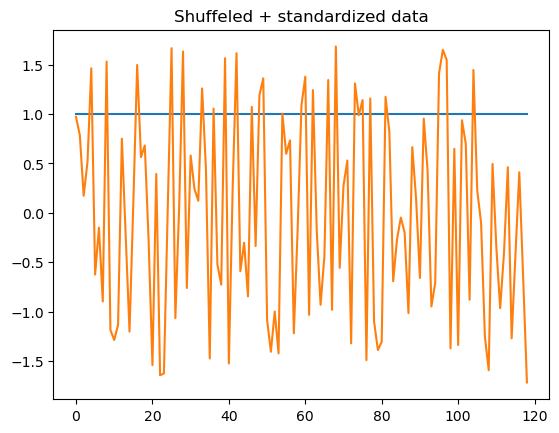

In [97]:
data2 = data2.sample(frac=1).reset_index(drop=True)

train = data2.loc[:int(len(data2)*0.6)]
test = data2.loc[int(len(data2)*0.6):]

for feat in train.columns.to_list()[1:]:
    feat_train = train[feat]
    mean = np.mean(feat_train)
    std = np.std(feat_train)
    train.loc[:, feat] = (feat_train - mean) / std

    feat_test = test[feat]
    test.loc[:, feat] = (feat_test - mean) / std

x_train = train[['intercept', 'x']]
y_train = train[['y']]
x_test = test[['intercept', 'x']]
y_test = test[['y']]

plt.plot(x_train)
plt.title("Shuffeled + standardized data")
plt.show()

MSE: 0.057633530511939764, R2: 0.9337463380645141


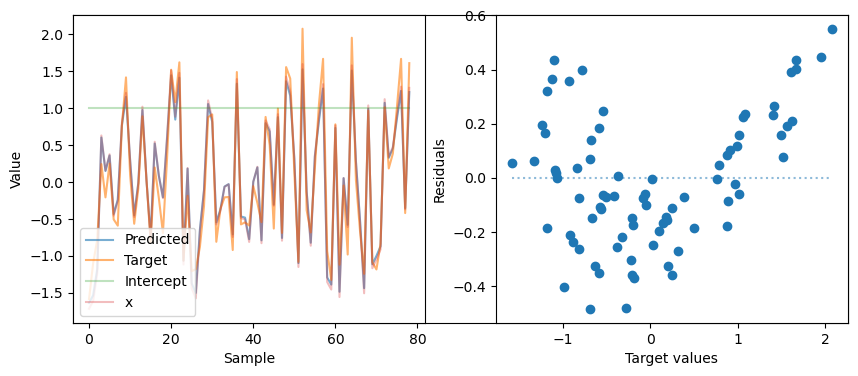

In [98]:
kernel_reg = KernelRegression(kernel_type='linear')
kernel_reg.fit(x_train, y_train)
pred = kernel_reg.predict(x_test, x_train)
print(f"MSE: {mean_squared_error(y_test, pred)}, R2: {r2_score(y_test, pred)}")
plot_results(y_test, pred)

MSE: 0.028464478991440414, R2: 0.9672781460459386


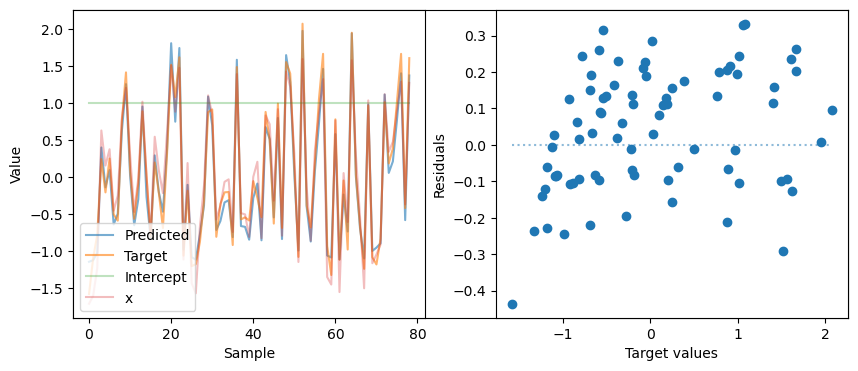

In [99]:
kernel_reg = KernelRegression(kernel_type='poly', C=1.5, degree=3)
kernel_reg.fit(x_train, y_train)
pred = kernel_reg.predict(x_test, x_train)
print(f"MSE: {mean_squared_error(y_test, pred)}, R2: {r2_score(y_test, pred)}")
plot_results(y_test, pred)

MSE: 0.02798936373691384, R2: 0.9678243233349957


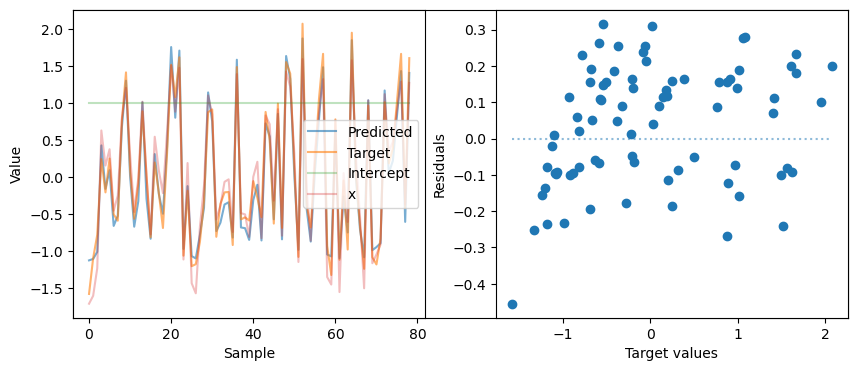

In [100]:
kernel_reg = KernelRegression(kernel_type='rbf', gamma=1.5)
kernel_reg.fit(x_train, y_train)
pred = kernel_reg.predict(x_test, x_train)
print(f"MSE: {mean_squared_error(y_test, pred)}, R2: {r2_score(y_test, pred)}")
plot_results(y_test, pred)